Merged Data Columns: Index(['Time', 'Speed', 'Density', 'Time', 'LinkBreakage', 'Time', 'Lifetime'], dtype='object')
        Time    Speed  Density       Time  LinkBreakage       Time   Lifetime
0  32.215550  3.16278      0.0  30.005987           1.0  31.214825   1.210430
1  32.218481  6.45569      2.0  30.005987           2.0  36.983235   6.978841
2  32.220318  8.12584      2.0  30.006421           3.0  38.265653   8.261258
3  32.221279  0.45000      5.0  30.006687           4.0  38.606039   8.601645
4  34.090822  5.77988      4.0  30.006687           5.0  41.337370  11.332976
Correlation Matrix:
                  Time     Speed   Density      Time  LinkBreakage      Time  \
Time          1.000000 -0.091288  0.369858  0.976123      0.984253  0.845386   
Speed        -0.091288  1.000000 -0.193897 -0.099232     -0.091314 -0.091585   
Density       0.369858 -0.193897  1.000000  0.383339      0.369308 -0.141655   
Time          0.976123 -0.099232  0.383339  1.000000      0.985673  0.84785

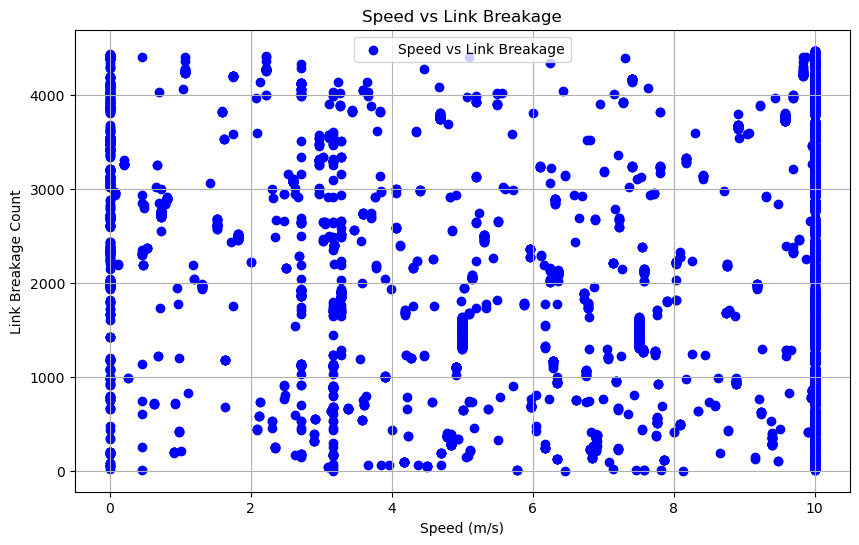

Correlation Results:
{'Speed vs Link Breakage': -0.09131384149979596, 'Speed vs Link Lifetime': -0.09158481992803341, 'Density vs Link Breakage': 0.3693084316464821, 'Density vs Link Lifetime': -0.1416551558227223}


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and split the 'time:value' format into separate columns where needed
def process_time_value_data(file_path, column_names, has_time=True):
    # 데이터 불러오기
    data = pd.read_csv(file_path, header=None)
    
    if has_time:
        # 데이터를 문자열로 변환
        data[0] = data[0].astype(str)
        # '시간:값' 형식을 분리 (split(':'))
        split_data = data[0].str.split(':', expand=True)
        split_data.columns = column_names[:len(split_data.columns)]
        # 값을 float로 변환
        split_data = split_data.astype(float)
    else:
        # 시간 정보가 없으면 값만 처리
        data.columns = column_names[1:]  # 첫 번째 열은 값만 포함
        split_data = data
    
    return split_data

# Process all provided files
speed_data = process_time_value_data('Speed.txt', ['Time', 'Speed'])
density_data = process_time_value_data('Density.txt', ['Time', 'Density'], has_time=False)  # 시간 정보 없음
link_breakage_data = process_time_value_data('link_breakage.txt', ['Time', 'LinkBreakage'])
link_lifetime_data = process_time_value_data('link_lifetime.txt', ['Time', 'Lifetime'])

# 병합할 때 시간 없이 순서대로 병합
merged_data = pd.concat([speed_data.reset_index(drop=True), 
                         density_data.reset_index(drop=True), 
                         link_breakage_data.reset_index(drop=True), 
                         link_lifetime_data.reset_index(drop=True)], axis=1)

# 열 이름 출력하여 확인
print("Merged Data Columns:", merged_data.columns)

# 데이터 출력하여 확인
print(merged_data.head())

# Calculate correlation
correlation_matrix = merged_data.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting Speed vs Link Breakage
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Speed'], merged_data['LinkBreakage'], c='blue', label='Speed vs Link Breakage')
plt.title('Speed vs Link Breakage')
plt.xlabel('Speed (m/s)')
plt.ylabel('Link Breakage Count')
plt.grid(True)
plt.legend()
plt.show()

# Manually extracting the required correlations
if 'Density' in correlation_matrix.columns:
    speed_link_breakage_corr = correlation_matrix.loc['Speed', 'LinkBreakage']
    speed_link_lifetime_corr = correlation_matrix.loc['Speed', 'Lifetime']
    density_link_breakage_corr = correlation_matrix.loc['Density', 'LinkBreakage']
    density_link_lifetime_corr = correlation_matrix.loc['Density', 'Lifetime']

    # Returning correlation results
    correlation_results = {
        "Speed vs Link Breakage": speed_link_breakage_corr,
        "Speed vs Link Lifetime": speed_link_lifetime_corr,
        "Density vs Link Breakage": density_link_breakage_corr,
        "Density vs Link Lifetime": density_link_lifetime_corr
    }

    print("Correlation Results:")
    print(correlation_results)
else:
    print("Error: 'Density' column not found.")


Merged Data Columns: Index(['Time', 'Speed', 'Density', 'LinkBreakage', 'Lifetime'], dtype='object')
        Time    Speed  Density  LinkBreakage   Lifetime
0  32.215550  3.16278      0.0           1.0   1.210430
1  32.218481  6.45569      2.0           2.0   6.978841
2  32.220318  8.12584      2.0           3.0   8.261258
3  32.221279  0.45000      5.0           4.0   8.601645
4  34.090822  5.77988      4.0           5.0  11.332976
Correlation Matrix:
                  Time     Speed   Density  LinkBreakage  Lifetime
Time          1.000000 -0.091288  0.369858      0.984253  0.845386
Speed        -0.091288  1.000000 -0.193897     -0.091314 -0.091585
Density       0.369858 -0.193897  1.000000      0.369308 -0.141655
LinkBreakage  0.984253 -0.091314  0.369308      1.000000  0.985828
Lifetime      0.845386 -0.091585 -0.141655      0.985828  1.000000


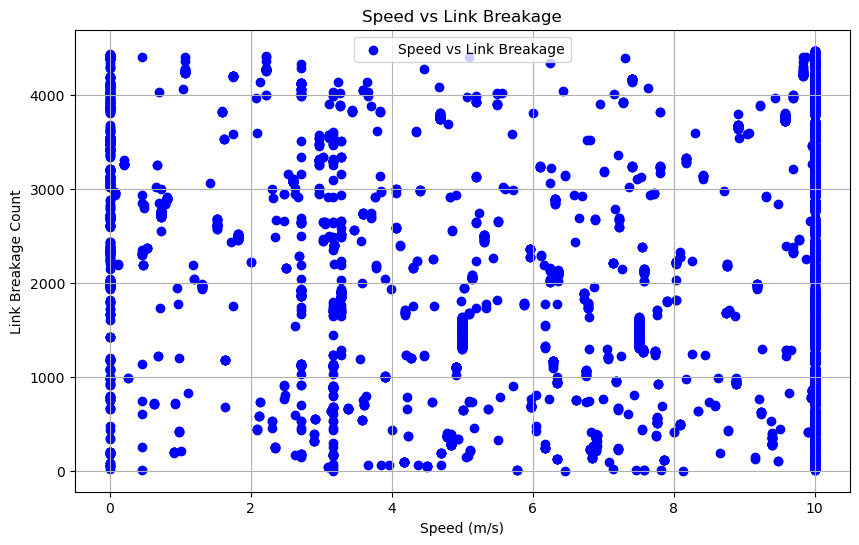

Correlation Results:
{'Speed vs Link Breakage': -0.09131384149979596, 'Speed vs Link Lifetime': -0.09158481992803341, 'Density vs Link Breakage': 0.3693084316464821, 'Density vs Link Lifetime': -0.1416551558227223}


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def process_time_value_data(file_path, column_names, has_time=True):
    data = pd.read_csv(file_path, header=None)
    if has_time:
        data[0] = data[0].astype(str)
        split_data = data[0].str.split(':', expand=True)
        split_data.columns = column_names[:len(split_data.columns)]
        split_data = split_data.astype(float)
    else:
        data.columns = column_names[1:]
        split_data = data
    return split_data

speed_data = process_time_value_data('Speed.txt', ['Time', 'Speed'])
density_data = process_time_value_data('Density.txt', ['Time', 'Density'], has_time=False)
link_breakage_data = process_time_value_data('link_breakage.txt', ['Time', 'LinkBreakage'])
link_lifetime_data = process_time_value_data('link_lifetime.txt', ['Time', 'Lifetime'])

merged_data = pd.concat([speed_data[['Time', 'Speed']].reset_index(drop=True), 
                         density_data.reset_index(drop=True), 
                         link_breakage_data[['LinkBreakage']].reset_index(drop=True), 
                         link_lifetime_data[['Lifetime']].reset_index(drop=True)], axis=1)

print("Merged Data Columns:", merged_data.columns)

print(merged_data.head())

correlation_matrix = merged_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Speed'], merged_data['LinkBreakage'], c='blue', label='Speed vs Link Breakage')
plt.title('Speed vs Link Breakage')
plt.xlabel('Speed (m/s)')
plt.ylabel('Link Breakage Count')
plt.grid(True)
plt.legend()
plt.show()

correlation_results = {
    "Speed vs Link Breakage": correlation_matrix.loc['Speed', 'LinkBreakage'],
    "Speed vs Link Lifetime": correlation_matrix.loc['Speed', 'Lifetime'],
    "Density vs Link Breakage": correlation_matrix.loc['Density', 'LinkBreakage'],
    "Density vs Link Lifetime": correlation_matrix.loc['Density', 'Lifetime']
}

print("Correlation Results:")
print(correlation_results)


In [14]:
# Density.txt 파일의 데이터 확인
density_data_raw = pd.read_csv('Density.txt', header=None)
print(density_data_raw.head())  # 파일의 첫 몇 줄 확인


   0
0  0
1  2
2  2
3  5
4  4
